# Proyek Analisis Data: [PRSA_Data_Wanliu_20130301-20170228]
- **Nama:** [Adelheid Chantal Lauw]
- **Email:** [mc232d5x0363@student.devacademy.id]
- **ID Dicoding:** [MC232D5X0363]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola musiman polusi udara di suatu lokasi?
- Apa faktor utama yang memengaruhi tingkat PM2.5 di berbagai wilayah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset
Wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")

# Menampilkan informasi umum tentang dataset
print(Wanliu_df.info())
print(Wanliu_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day  

**Insight:**
- read_csv() berfungsi untuk membaca berkas CSV dan mengubahnya menjadi DataFrame Pandas.
- metode info() menampilkan struktur dataset.
- metode describe () memberikan statistik deskriptif dari kolom numerik.

### Assessing Data

In [ ]:
# Cek missing values
print("Jumlah nilai NaN di setiap kolom:")
print(Wanliu_df.isnull().sum())

# Mengisi nilai NaN dengan median (opsi lain: drop atau imputasi dengan metode lain)
Wanliu_df.fillna(Wanliu_df.median(numeric_only=True), inplace=True)

Jumlah nilai NaN di setiap kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


**Insight:**
- metode isnull() untuk mengidentifikasi missing value dalam dataset.
metode sum() untuk menjumlahkan missing value pada setiap kolom di dataset.
- median(numeric_only=True) berguna untuk menghitung median dari setiap kolom numerik, dengan opsi numeric_only=True untuk memastikan hanya kolom numerik yang dihitung, agar terhindar dari error.

### Cleaning Data

Jumlah data sebelum pembersihan: 35064
Jumlah data setelah pembersihan: 31722


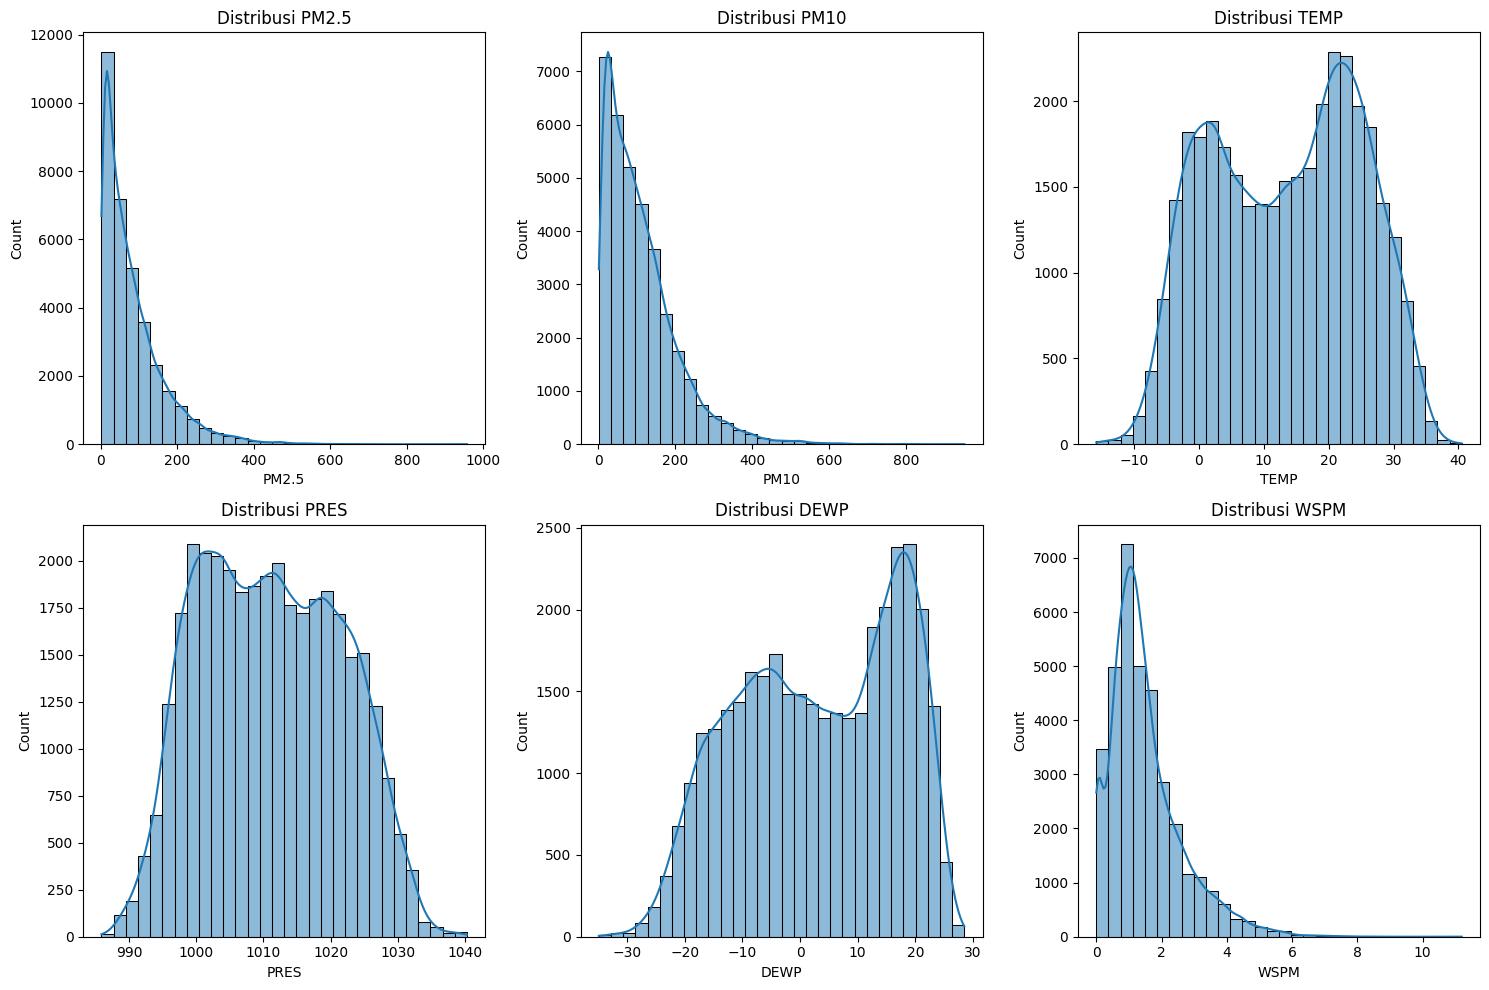

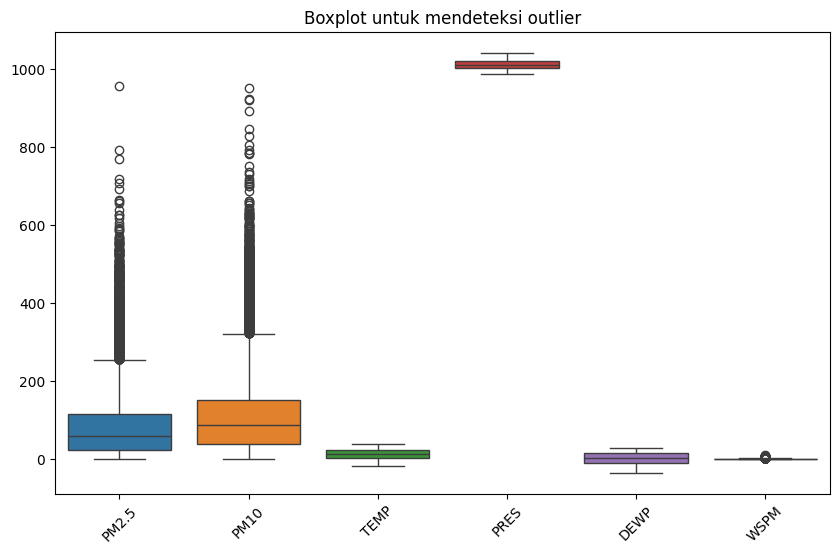

In [15]:
# Menghapus outlier berdasarkan IQR
cols = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'WSPM']
Q1 = Wanliu_df[cols].quantile(0.25)
Q3 = Wanliu_df[cols].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR
Wanliu_clean_df = Wanliu_df[~((Wanliu_df[cols] < batas_bawah) | (Wanliu_df[cols] > batas_atas)).any(axis=1)]

print(f"Jumlah data sebelum pembersihan: {Wanliu_df.shape[0]}")
print(f"Jumlah data setelah pembersihan: {Wanliu_clean_df.shape[0]}")

# Cek distribusi data dengan histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cols = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'WSPM']
for ax, col in zip(axes.flatten(), cols):
    sns.histplot(Wanliu_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Analisis outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Wanliu_df[cols])
plt.xticks(rotation=45)
plt.title('Boxplot untuk mendeteksi outlier')
plt.show()

**Insight:**
- Metode untuk memeriksa data outlier dengan menghitung kuantil dengan .quantile(0.25) dan .quantile(0.75). Q1 artinya nilai di bawahnya terdapat 25% data dan Q3 nilai di bawahnya terdapat 75%.
- Membuang data di luar rentang dengan menambahkan ~() dengan batasan yang digunakan dengan pemisah | (or).
- zip(axes.flatten(), cols), zip () untuk membuat pasangan (ax, col) yang terbuat dari sumbu subplot (ax) dan nama kolom (col). axes berguna untuk array 2D dari subplot. axes.flatten() mengubah array 2D menjadi 1D akan lebih mudah di-loop dan cols daftar nama kolom yang ingin dibuat histogramnya.
- sns.histplot untuk membuat histogram dari kolom tertentu.
- plt.tight_layout() mengatur tata letak subplot agar tidak saling bertumpukan dan tampil dengan rapi.
- plt.show() menampilkan seluruh grafik setelah proses loop selesai.
- sns.boxplot() digunakan untuk membuat boxplot dari beberapa kolom numerik dalam dataset.
- plt.xticks berfungsi untuk memutar nama label kolom di sumbu x

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
Wanliu_df['date'] = pd.to_datetime(Wanliu_df[['year', 'month', 'day', 'hour']])
monthly_mean = Wanliu_clean_df.groupby('month')[['PM2.5', 'PM10']].mean().reset_index()
korelasi = Wanliu_clean_df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

**Insight:**
- pd.to_datetime() berfungsi untuk mengubah data waktu menjadi format datetime di Pandas.
-  fungsi groupby() untuk mengelompokkan data berdasarkan bulan/month
- metode mean() untuk menghitung rata-rata dari kolom PM2.5 dan PM10 di setiap bulannya.
- metode reset_index() untuk mengembalikan hasil dalam bentuk DataFrame yang lebih rapi.
- corr() metode untuk menghitung korelasi antara kolom numerik dalam DataFrame.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

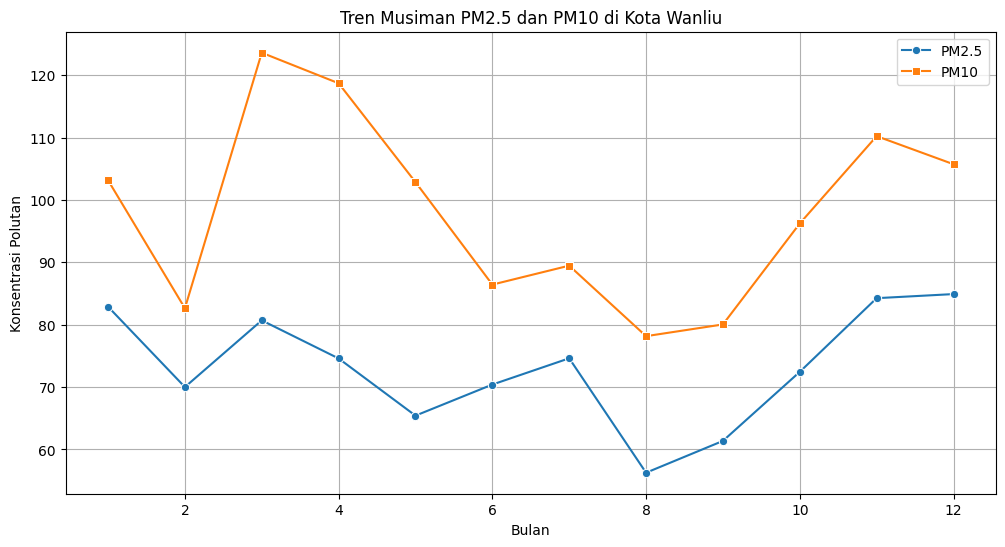

In [18]:
# Tren PM2.5 dan PM10 per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean['month'], y=monthly_mean['PM2.5'], label='PM2.5', marker='o')
sns.lineplot(x=monthly_mean['month'], y=monthly_mean['PM10'], label='PM10', marker='s')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.title('Tren Musiman PM2.5 dan PM10 di Kota Wanliu')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

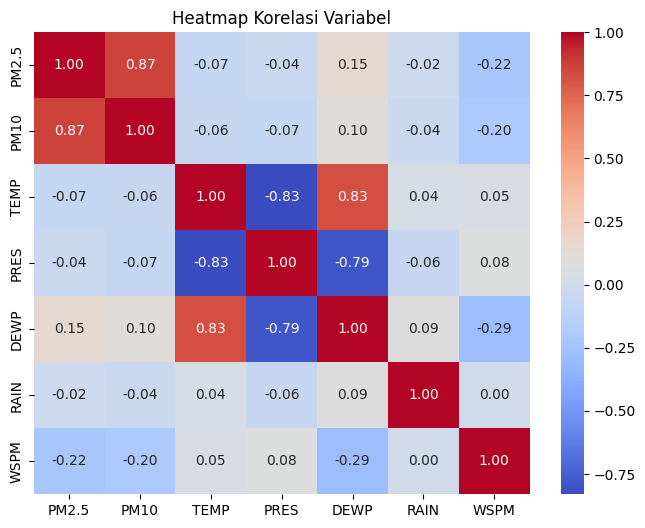

In [19]:
# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel')
plt.show()

**Insight:**
- plt.figure berfungsi untuk membuat kanvas kosong berukuran 12x6 inci.
- sns.lineplot() untuk membuat grafik lurus untuk variable PM2.5 dengan sumbu x sebagai bulan 1 sampai 12 dan sumbu y sebagai rata-rata PM2.5 per bulannya.
Parameter label untuk memberi label garis dan parameter marker='o' untuk memberikan tanda titik di setiap bulannya.
- plt.xlabel dan plt.ylabel untuk memberi label pada sumbu X dan Y.
- plt.title untuk memberikan judul pada grafik.
- plt.legend() untuk memberikan perbedaan garis PM2.5 dan PM10.
- plt.grid() untuk menambahkan grid agar lebih jelas.
- plt.show() untuk menampilkan grafik.
- sns.heatmap() untuk membuat heatmap berdasarkan matriks korelasi antar variabel dalam matriks warna menggunakan seaborn.
- annot=True memiliki fungsi untuk menampilkan angka dalam setiap sel heatmap.
- cmap untuk memberikan warna pada heatmap.

## Analisis Lanjutan (Opsional)

## Conclusion

Analisis dilakukan dengan menggunakan data dari Kota Wanliu.
- Terjadinya perubahan musim yang tidak menentu sepanjang tahun yang disebabkan oleh banyak faktor. PM merupakan Particulate Matter yang artinya semakin kecil nilainya (partikel udaranya) semakin berbahaya bagi kesehatan. Tren musiman PM10 cenderung lebih tinggi dibandingkan dengan PM2.5. Dengan asumsi musim panas terjadi pada bulan Juni-Agustus, maka pada musim panas tingkat polusi udara cenderung lebih rendah dibandingkan pada musim panas, begitu juga sebaliknya ketika musim hujan tingkat polutannya bertambah.
- Berdasarkan heatmap yang dihasilkan dari perhitungan, variabel TEMP (suhu udara) memberikan nilai korelasi negatif yang artinya ketika suhu meningkat, kadar PM2.5 cenderung menurun. Variabel PRES (tekanan udara) dan DEWP (titik embun) tidak memberikan pengaruh besar karena nilainya yang sangat kecil. Variabel RAIN(hujan), memiliki nilai korelasi negatif , sehingga ketika terjadi hujan polusi udara akan menurun. Variabel WSPM(kecepatan angin) memiliki pengaruh terhadap penyebaran polutan PM2.5 ini, semakin besar nilainya atau tinggi kecepatan anginnya konsentrasi PM2.5 semakin rendah polutan akan tersebar luas.